<h1 style='text-align: center'>Previsão de Preço de Alugeis Residênciais <br> na cidade de São Paulo <br>🏘</h1>

### Equipe:
- Danilo Pontes;
- Jonatha Silva;
- Marcos Antonio;
- Sanderson Rawan;
- Saulo Bernardo;
- Wiliams Alves.

### Objetivo

objetivo deste projeto é desenvolver um modelo de machine learning de regressão capaz de prever com uma precisão de 75% os preços de aluguéis dos imóveis residenciais da cidade de São Paulo. O escopo do projeto abrange a implementação desse modelo em um aplicativo de dados, proporcionando aos usuários uma ferramenta prática para estimar o valor do aluguel com base em diferentes características imobiliárias.


### Sobre a Base de Dados Usada no Projeto

A base de dados usada foi o dataset [housing_sp_city](https://www.kaggle.com/datasets/ex0ticone/house-prices-of-sao-paulo-city/data) que esta disponível na plataforma kaggle.com. Os dados são referente a preços de anuncios de imóveis na cidade de São Paulo entre os anos de 2011 a 2019.

### Cenário
Uma imobiliária que opera em São Paulo, deseja otimizar a precificação de aluguéis para seus clientes. Atualmente, a empresa enfrenta desafios na definição de preços competitivos e justos para os diferentes imóveis que gerencia na cidade. A falta de um sistema de precificação eficiente resulta em inconsistências nos valores de aluguel, levando a perdas financeiras e insatisfação entre proprietários e inquilinos.

### Problema de Negócio
A dificuldades em estabelecer preços justos de aluguéis que reflitam de maneira precisa as características únicas de cada imóvel e as condições específicas do mercado em cada cidade. A abordagem atual baseia-se em avaliações subjetivas, o que leva a variações nos preços que não são necessariamente justificadas por fatores objetivos. Isso resulta em imóveis que podem estar subvalorizados, prejudicando a rentabilidade da imobiliária, ou superavaliados, o que pode afetar a atração de inquilinos.

### Proposta de Solução
Implementação de um modelo de machine learning de regressão em um data app, para prever preços de aluguéis visando resolver o problema de negócio enfrentado pela imobiliária, proporcionando uma abordagem mais eficiente e precisa na precificação de seus imóveis com um modelo que preveja os preços com no minimo 75% de acertividade.

## Importações

In [1]:
import os
import shutil
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')

/home/will/.pyenv/versions/projetoML/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Carregando o dataset

In [2]:
df = pd.read_csv('dados_originais/housing_sp_city.csv', encoding='utf-8')

<h2>Tratamento dos Dados</h2>

### Exploração dos dados

In [3]:
# Visualização das primeiras linhas
df.head()

,logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
0,Rua Juvenal Galeno,53,Jardim da Saúde,4290030.0,São Paulo,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,Venda,700000,NaN,NaN,NaN,NaN
1,Rua Juruaba,16,Vila Santa Teresa (Zona Sul),4187320.0,São Paulo,Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,Venda,336000,NaN,NaN,NaN,NaN
2,Avenida Paulista,402,Bela Vista,1311000.0,São Paulo,Comercial,396.0,4.0,0.0,0.0,5.0,2018-12-18,Locação,24929,4900.0,MONTHLY,29829.0,4040.0
3,Rua Alvorada,1190,Vila Olímpia,4550004.0,São Paulo,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,Venda,739643,686.0,NaN,NaN,1610.0
4,Rua Curitiba,380,Paraíso,4005030.0,São Paulo,Apartamento,3322.0,5.0,4.0,4.0,5.0,2018-12-14,Venda,7520099,6230.0,NaN,NaN,18900.0


In [4]:
# Visualização das últimas linhas
df.tail()

,logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
133959,Rua Glicério,255,Liberdade,1514000.0,São Paulo,Apartamento,53.0,2.0,1.0,2.0,1.0,2018-11-28,Venda,249782,210.0,NaN,NaN,0.0
133960,Rua Laboriosa,NaN,Jardim das Bandeiras,5434060.0,São Paulo,Escritório,450.0,3.0,1.0,3.0,4.0,2018-08-08,Venda,1085000,NaN,NaN,NaN,507.0
133961,Rua José Pereira de Carvalho,10,Vila Lageado,5337090.0,São Paulo,Apartamento,20.0,3.0,2.0,3.0,2.0,2019-02-06,Venda,623000,NaN,NaN,NaN,NaN
133962,Rua Evangelista Rodrigues,234,Alto de Pinheiros,5463000.0,São Paulo,Casa de dois andares,357.0,4.0,1.0,4.0,4.0,2018-04-14,Venda,1820000,0.0,NaN,NaN,665.0
133963,Avenida da Liberdade,113,Liberdade,1503000.0,São Paulo,Escritório,40.0,1.0,NaN,NaN,NaN,2018-10-19,Locação,842,399.0,MONTHLY,1241.0,1610.0


In [5]:
# Dimensões da base de dados
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')

Linhas: 133964 | Colunas: 18


In [6]:
# Informações gerais da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133964 entries, 0 to 133963
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   logradouro       126962 non-null  object 
 1   numero           89823 non-null   object 
 2   bairro           133943 non-null  object 
 3   cep              128056 non-null  float64
 4   cidade           133964 non-null  object 
 5   tipo_imovel      133964 non-null  object 
 6   area_util        130868 non-null  float64
 7   banheiros        133051 non-null  float64
 8   suites           120347 non-null  float64
 9   quartos          130945 non-null  float64
 10  vagas_garagem    129539 non-null  float64
 11  anuncio_criado   133964 non-null  object 
 12  tipo_anuncio     133964 non-null  object 
 13  preco_venda      133964 non-null  int64  
 14  taxa_condominio  117127 non-null  float64
 15  periodicidade    29051 non-null   object 
 16  preco_aluguel    28714 non-null   floa

In [7]:
# Verificando os tipos de imóveis
df['tipo_imovel'].value_counts()

tipo_imovel
Apartamento               72241
Casa de dois andares      18068
Casa                       9030
Escritório                 7714
Flat                       7661
Comercial                  6534
Condomínio                 4015
Cobertura                  2772
Depósito                   2197
Loteamento Residencial     1430
Loteamento Comercial        807
Loja                        694
Kitnet                      522
Prédio Residencial          142
Prédio Comercial             85
Clínica                      33
Fazenda                      10
Casa de Campo                 9
Name: count, dtype: int64

**Serão selecionados os tipode de imóveis apartamento, casa, flat e kitnet.**

In [8]:
# aplicando filtro de tipo de imóveis
df = df[df['tipo_imovel'].isin(['Apartamento', 'Casa', 'Flat', 'Kitnet'])]

**Verificando tipos de anuncios do dataset.**

In [9]:
# Verificando os tipos de anuncios
df['tipo_anuncio'].value_counts()

tipo_anuncio
Venda      74917
Locação    14537
Name: count, dtype: int64

In [10]:
# Filtrando apenas a cidade de São Paulo
df = df[df['cidade'].isin(['São Paulo'])]

### Preparando a base de imóveis disponíveis para locação

In [11]:
# Aplicando filtro
aluguel = df[df['tipo_anuncio'].isin(['Locação'])]

In [12]:
# Verificando a periodicidade da taxa de condominio
aluguel['periodicidade'].value_counts()

periodicidade
MONTHLY    14457
DAILY         15
YEARLY         1
Name: count, dtype: int64

In [13]:
# Filtrando a periodicidade
aluguel = aluguel[aluguel['periodicidade'].isin(['MONTHLY'])]

In [14]:
# Removendo erros da coluna bairro
aluguel = aluguel[~aluguel['bairro'].str.contains('Rua', case=False, na=False)]

In [15]:
# Verificando dados nulos
aluguel.isnull().sum()

logradouro          642
numero             3302
bairro                4
cep                 585
cidade                0
tipo_imovel           0
area_util           160
banheiros             1
suites             1505
quartos               1
vagas_garagem       165
anuncio_criado        0
tipo_anuncio          0
preco_venda           0
taxa_condominio     468
periodicidade         0
preco_aluguel         0
iptu_ano            571
dtype: int64

In [16]:
# Removendo colunas com muitos dados nulos e também colunas não relevantes por serem de filtro
aluguel = aluguel.drop(['logradouro', 'numero', 'cep', 'cidade', 'anuncio_criado', 'tipo_anuncio', 'preco_venda', 'periodicidade'], axis=1)

In [17]:
# Verificando nulos após a remoção das colunas
aluguel.isnull().sum()

bairro                4
tipo_imovel           0
area_util           160
banheiros             1
suites             1505
quartos               1
vagas_garagem       165
taxa_condominio     468
preco_aluguel         0
iptu_ano            571
dtype: int64

In [18]:
# tratando dados nulos de suítes e vagas de garagem
aluguel['suites'] = aluguel['suites'].fillna(0)
aluguel['vagas_garagem'] = aluguel['vagas_garagem'].fillna(0)

In [19]:
# Verificando dados nulos após o tratamento da veriáveis de suites e vagas de garagem
aluguel.isnull().sum()

bairro               4
tipo_imovel          0
area_util          160
banheiros            1
suites               0
quartos              1
vagas_garagem        0
taxa_condominio    468
preco_aluguel        0
iptu_ano           571
dtype: int64

In [20]:
# Removendo dados nulos da base
aluguel = aluguel.dropna()

In [21]:
# Verificando nulos após o drop
aluguel.isnull().sum()

bairro             0
tipo_imovel        0
area_util          0
banheiros          0
suites             0
quartos            0
vagas_garagem      0
taxa_condominio    0
preco_aluguel      0
iptu_ano           0
dtype: int64

In [22]:
# Ajustando tipo variáveis float para int
aluguel[['banheiros', 'suites', 'quartos', 'vagas_garagem']] = aluguel[['banheiros', 'suites', 'quartos', 'vagas_garagem']].astype(int)

In [23]:
# Filtrando iptu e taxa de condominio diferentes de 0
aluguel = aluguel[aluguel['iptu_ano'] != 0]
aluguel = aluguel[aluguel['taxa_condominio'] != 0]

In [24]:
# Visualizando a base tratada
aluguel

,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,taxa_condominio,preco_aluguel,iptu_ano
5,Vila Uberabinha,Flat,45.0,0,1,1,1,560.0,2450.0,87.0
44,Jardim Paulista,Flat,34.0,1,0,1,1,714.0,1882.0,77.0
46,Indianópolis,Apartamento,240.0,3,2,4,3,1798.0,12299.0,2800.0
53,Campos Eliseos,Flat,32.0,1,0,1,1,385.0,1421.0,49.0
54,Cidade São Francisco,Apartamento,72.0,2,1,3,2,401.0,1941.0,93.0
...,...,...,...,...,...,...,...,...,...,...
133879,Pinheiros,Apartamento,160.0,1,4,4,2,1847.0,7797.0,539.0
133883,Pinheiros,Flat,30.0,1,0,1,1,700.0,3020.0,129.0
133896,Bela Vista,Flat,36.0,1,0,1,1,770.0,1809.0,70.0
133923,Jardim das Bandeiras,Apartamento,117.0,2,1,1,2,959.0,5649.0,335.0


## Análise Exploratória

#### Análisando Outliers

In [25]:
# Varificando outliers
aluguel.describe()

,area_util,banheiros,suites,quartos,vagas_garagem,taxa_condominio,preco_aluguel,iptu_ano
count,11170.000000,11170.000000,11170.000000,11170.000000,11170.000000,1.117000e+04,1.117000e+04,1.117000e+04
mean,112.087914,2.077440,1.150850,2.060788,1.743957,1.434621e+03,5.396761e+03,8.147809e+02
std,102.806359,1.544169,1.150304,1.158792,2.657211,1.879100e+04,2.078980e+04,1.750960e+04
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,5.140000e+02,1.000000e+00
25%,39.000000,1.000000,0.000000,1.000000,1.000000,6.980000e+02,2.275000e+03,8.300000e+01
50%,65.000000,1.000000,1.000000,2.000000,1.000000,8.820000e+02,3.080000e+03,1.400000e+02
75%,162.000000,3.000000,1.750000,3.000000,2.000000,1.340250e+03,5.740000e+03,4.060000e+02
max,1800.000000,9.000000,11.000000,14.000000,252.000000,1.735300e+06,1.740200e+06,1.715000e+06


Visualizando a tabela do `describe` podemos avaliar que temos outliers que precisam ser tratados antes de proceguirmos para os modelos preditivos, então vamos aplicar uma capagem nos dados, ou seja, vamos substituir por valores dentro de um limite aceitavel usando a função `winsorize` da biblioteca de estatística `scipy`. Utilizamos essa abordagem para não perder dados da base.

In [26]:
df_aluguel = aluguel.copy()

# Aplicando capagem
df_aluguel['preco_aluguel'] = winsorize(df_aluguel['preco_aluguel'], limits=[0.05, 0.05])
df_aluguel['iptu_ano'] = winsorize(df_aluguel['iptu_ano'], limits=[0.05, 0.05])
df_aluguel['taxa_condominio'] = winsorize(df_aluguel['taxa_condominio'], limits=[0.05, 0.05])
df_aluguel['vagas_garagem'] = winsorize(df_aluguel['vagas_garagem'], limits=[0.05, 0.05])
df_aluguel['quartos'] = winsorize(df_aluguel['quartos'], limits=[0.05, 0.05])
df_aluguel['suites'] = winsorize(df_aluguel['suites'], limits=[0.05, 0.05])
df_aluguel['banheiros'] = winsorize(df_aluguel['banheiros'], limits=[0.05, 0.05])


In [27]:
# Estatística da base após o tratamento
df_aluguel.describe()

,area_util,banheiros,suites,quartos,vagas_garagem,taxa_condominio,preco_aluguel,iptu_ano
count,11170.000000,11170.000000,11170.000000,11170.000000,11170.000000,11170.000000,11170.000000,11170.000000
mean,112.087914,2.061415,1.097046,2.054342,1.704745,1120.533930,4619.448702,321.292659
std,102.806359,1.418760,1.027372,1.128903,1.014897,655.238894,3381.687650,361.606352
min,1.000000,1.000000,0.000000,1.000000,1.000000,386.000000,1767.000000,62.000000
25%,39.000000,1.000000,0.000000,1.000000,1.000000,698.000000,2275.000000,83.000000
50%,65.000000,1.000000,1.000000,2.000000,1.000000,882.000000,3080.000000,140.000000
75%,162.000000,3.000000,1.750000,3.000000,2.000000,1340.250000,5740.000000,406.000000
max,1800.000000,5.000000,3.000000,4.000000,4.000000,2800.000000,13846.000000,1365.000000


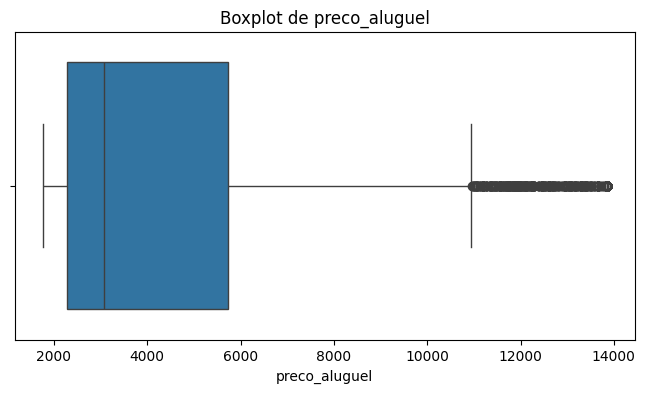

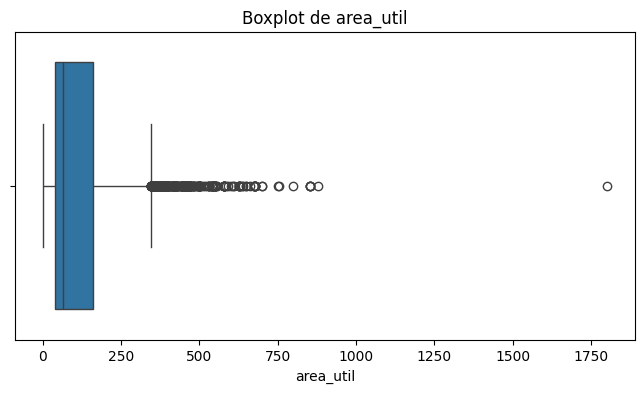

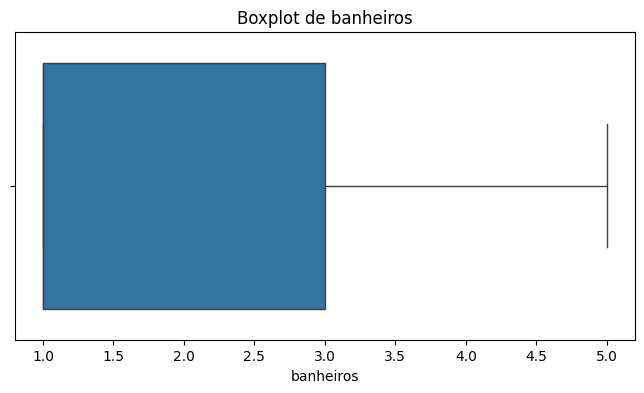

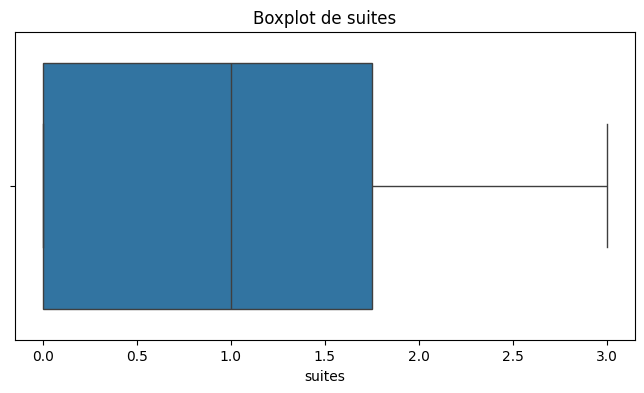

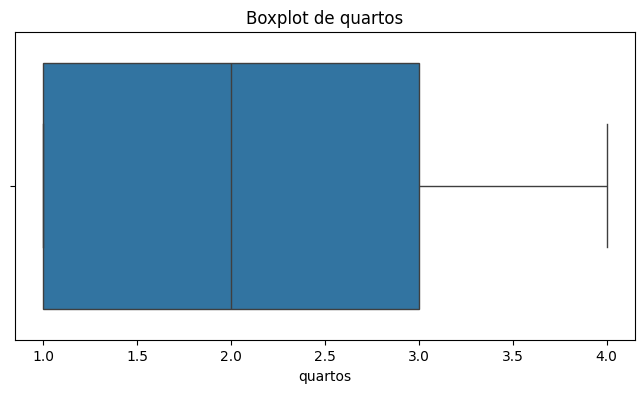

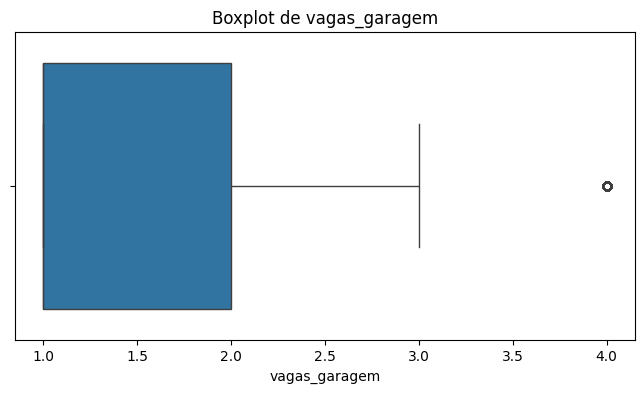

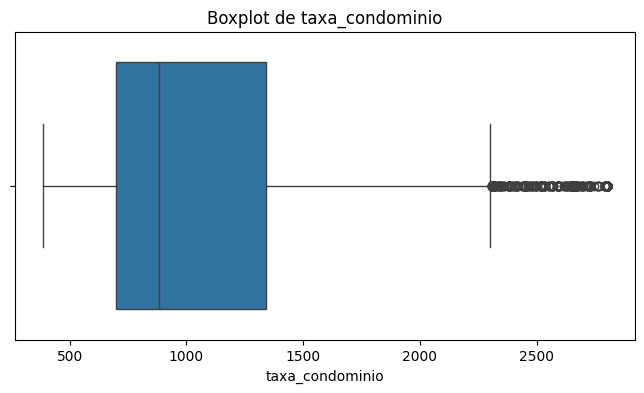

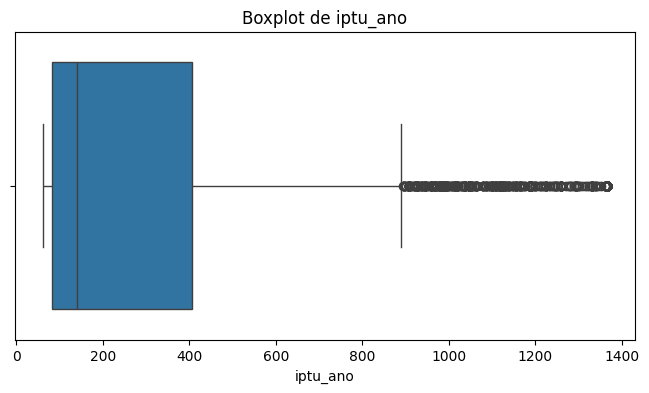

In [28]:
# Visualizando os boxplots das veriáveis
for coluna in ['preco_aluguel', 'area_util', 'banheiros', 'suites', 'quartos', 'vagas_garagem', 'taxa_condominio', 'iptu_ano']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_aluguel[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.show()

Como podemos observar em alguns boxplots, ainda existe a presença de alguns outliers, mas ao contrario do cenario anterior agora eles estão dentro do aceitável, e não causará tantos problemas, uma vez que, usaremos modelos robustos para lidar com eles.

In [29]:
# Salvando a base de dados

df_aluguel.to_csv('dataset_aluguel/base_aluguel.csv', index=False)

#### A influência no tipo de imóvel nos preços de aluguel

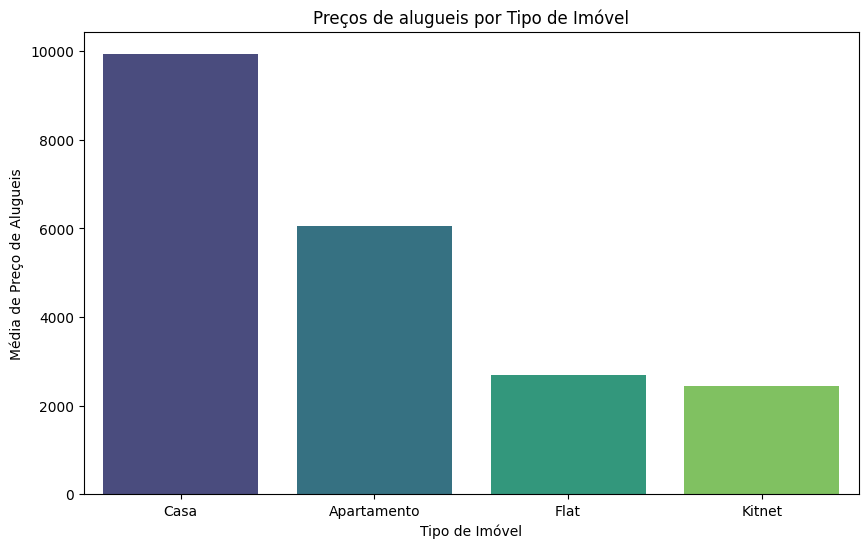

In [30]:
imovel_aluguel = df_aluguel.groupby('tipo_imovel')['preco_aluguel'].mean().\
                    reset_index().sort_values('preco_aluguel', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(imovel_aluguel, x='tipo_imovel', y='preco_aluguel', palette='viridis')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Média de Preço de Alugueis')
plt.title('Preços de alugueis por Tipo de Imóvel')
plt.show()

Podemos observar que o tipo de imóvel influencia na cotação dos preços de alugueis, sendo casas com os maiores preços enquanto kitnets com os menores preços.

#### Correlação das variáveis independentes com o preço de aluguel

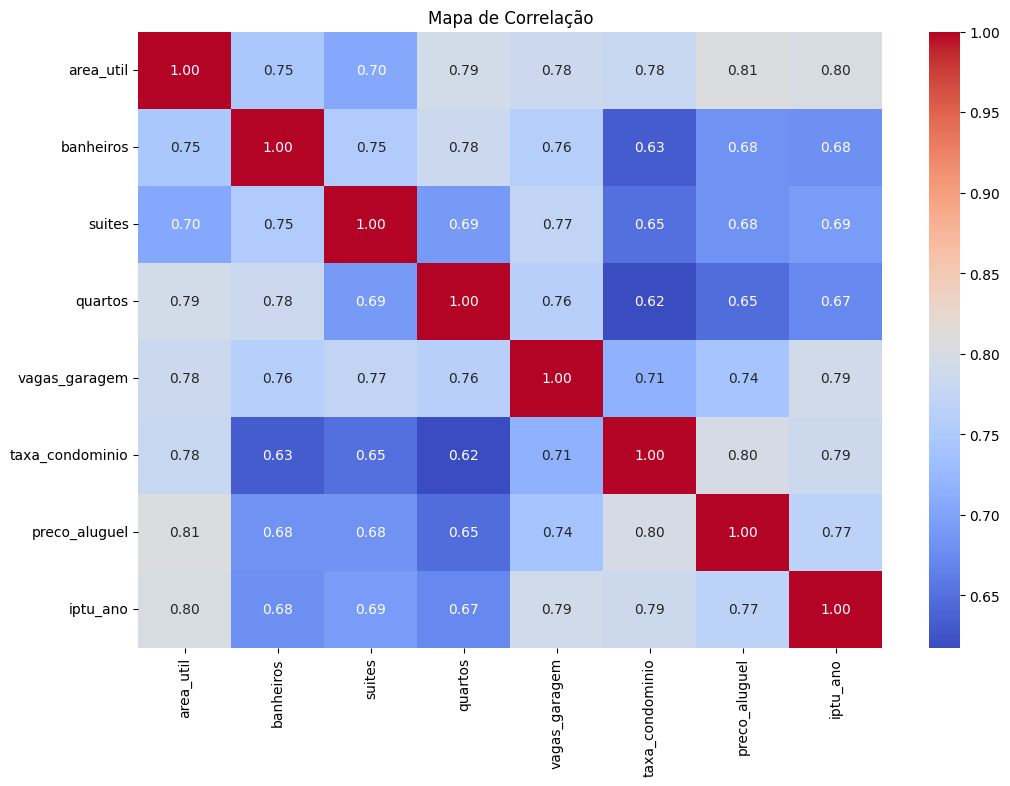

In [31]:
df_corr = df_aluguel.iloc[:,2:]

corr_matriz = df_corr.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matriz, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Mapa de Correlação')
plt.show()

Podemos verificar que a única variável que apresenta uma forte correlação com o preço do aluguel é a taxa de condominio. As vriáveis de banheiros, quartos, suítes, são fortemente correlacionadas naturalemtente com a área, pois esta define o tamanho do imóvel.

## Pré-processamento dos Dados

Nesta etapa vamos realizar a padronização dos dados para que sejam compreendidos pelos algoritmos de aprendizagem de máquina que vamos, mais a frente, aplicar. O Pré-processamento será feito a partir dos seguintes passos:

- Separação das variáveis preditora e variável alvo.
- Pré-processamento dos dados das variáveis preditoras usando o [Pipeline](https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html#) juntamente com [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) e [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
- Divisão dos dados pré-processados em dados de treino e teste usando o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

#### Separando variáveis previsoras da variável alvo

In [32]:
# Separando variáveis preditoras e variável alvo
X = df_aluguel.drop(['preco_aluguel'], axis=1)
y = df_aluguel.iloc[:,8].values

In [33]:
# Visualizando X
X

,bairro,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,taxa_condominio,iptu_ano
5,Vila Uberabinha,Flat,45.0,1,1,1,1,560.0,87.0
44,Jardim Paulista,Flat,34.0,1,0,1,1,714.0,77.0
46,Indianópolis,Apartamento,240.0,3,2,4,3,1798.0,1365.0
53,Campos Eliseos,Flat,32.0,1,0,1,1,386.0,62.0
54,Cidade São Francisco,Apartamento,72.0,2,1,3,2,401.0,93.0
...,...,...,...,...,...,...,...,...,...
133879,Pinheiros,Apartamento,160.0,1,3,4,2,1847.0,539.0
133883,Pinheiros,Flat,30.0,1,0,1,1,700.0,129.0
133896,Bela Vista,Flat,36.0,1,0,1,1,770.0,70.0
133923,Jardim das Bandeiras,Apartamento,117.0,2,1,1,2,959.0,335.0


In [34]:
# Visualizando y
y

masked_array(data=[ 2450.,  1882., 12299., ...,  1809.,  5649., 13846.],
             mask=False,
       fill_value=1e+20)

In [35]:
X.shape, y.shape

((11170, 9), (11170,))

#### Normalização dos dados

In [36]:
# Definindo variáveis com features numéricas e categóricas
variavel_num = [
    'area_util',
    'banheiros',
    'suites',
    'quartos',
    'vagas_garagem',
    'taxa_condominio',
    'iptu_ano'
]
variavel_cat = [
    'bairro',
    'tipo_imovel'
]

In [37]:
# Definido transformações com estimador final
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

In [38]:
# Criando o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, variavel_num),
        ('cat', cat_transformer, variavel_cat)
    ])

In [39]:
# Aplicando o pré-processamento
X_processed = preprocessor.fit_transform(X)

In [40]:
# Dimensões da base pré-processada
print('Linhas:',X_processed.shape[0])
print('Colunas:',X_processed.shape[1])

Linhas: 11170
Colunas: 357


#### Divisão de teste e treino

In [41]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_processed, y, test_size=0.3, random_state=1
)

In [42]:
X_treino.shape, y_treino.shape

((7819, 357), (7819,))

In [43]:
X_teste.shape, y_teste.shape

((3351, 357), (3351,))

In [65]:
# Salvando base de treino e teste
with open('dataset_aluguel/base_treino_teste.pkl', 'wb') as f:
    pickle.dump([X_treino, X_teste, y_treino, y_teste], f)

## Modelagem Preditiva

Serão avaliados quatro algoritmos de regressão:

1. [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

2. [Decision Tree](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

3. [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

4. [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)


### 1. Regressão Linear Multipla

- A regressão linear é simples e rápida. Este modelo é uma escolha inicial para prever o preço de venda, especialmente se houver uma relação linear clara entre as variáveis independentes (como área útil, número de quartos, etc.) e o preço de venda. Apesar de ser simples, pode ser útil como base para comparação com modelos mais complexos.

In [44]:
lr = LinearRegression()
lr.fit(X_treino, y_treino)
y_pred_linear = lr.predict(X_teste)

# Avaliação do modelo de regressão linear
mae_linear = mean_absolute_error(y_teste, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_teste, y_pred_linear))
print(f"Regressão Linear - MAE: {mae_linear} | Regressão Linear - RMSE: {rmse_linear}")

Regressão Linear - MAE: 1011.3735008525088 | Regressão Linear - RMSE: 1479.3365695239122


### 2. Árvore de Decisão

- As árvores de decisão é uma técnica para capturar interações complexas e não-lineares nos dados. Elas são capazes de dividir os dados em diferentes "ramos" e capturar decisões baseadas em várias condições.

In [45]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_treino, y_treino)
y_pred_tree = tree.predict(X_teste)

# Avaliação do modelo de árvore de decisão
mae_tree = mean_absolute_error(y_teste, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_teste, y_pred_tree))
print(f"Árvore de Decisão - MAE: {mae_tree} | Árvore de Decisão - RMSE: {rmse_tree}")

Árvore de Decisão - MAE: 881.6930162800337 | Árvore de Decisão - RMSE: 1664.900120927893


### 3. Random Forest

- O Random Forest é uma técnica de ensemble, ou seja, combina várias árvores de decisão para melhorar a precisão e reduzir o risco de overfitting. Essa abordagem tem maior capacidade de generalizar e costuma oferecer melhor desempenho do que uma única árvore de decisão. Ele pode lidar com dados não-lineares, interações complexas e é robusto a outliers.

In [46]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_treino, y_treino)
y_pred_rf = rf.predict(X_teste)

# Avaliação do modelo Random Forest
mae_rf = mean_absolute_error(y_teste, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_teste, y_pred_rf))
print(f"Random Forest - MAE: {mae_rf} | Random Forest - RMSE: {rmse_rf}")

Random Forest - MAE: 742.88505836377 | Random Forest - RMSE: 1259.810830451297


### 4. SVM

- O SVR é particularmente eficaz para capturar relações não-lineares entre as variáveis de entrada e o preço do imóvel. O SVR também é robusto a outliers e pode ser ajustado para evitar overfitting.

In [47]:
sv = SVR()
sv.fit(X_treino, y_treino)
y_pred_sv = sv.predict(X_teste)

# Avaliação do modelo Random Forest
mae_sv = mean_absolute_error(y_teste, y_pred_sv)
rmse_sv = np.sqrt(mean_squared_error(y_teste, y_pred_sv))
print(f"SVR - MAE: {mae_sv} | SVR - RMSE: {rmse_sv}")

SVR - MAE: 1921.560224555604 | SVR - RMSE: 3195.178328675472


### Comparação de desempenho dos modelos

In [48]:
# Comparando os modelos
models = ['Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'SVM']
mae_values = [mae_linear, mae_tree, mae_rf, mae_sv]
rmse_values = [rmse_linear, rmse_tree, rmse_rf, rmse_sv]

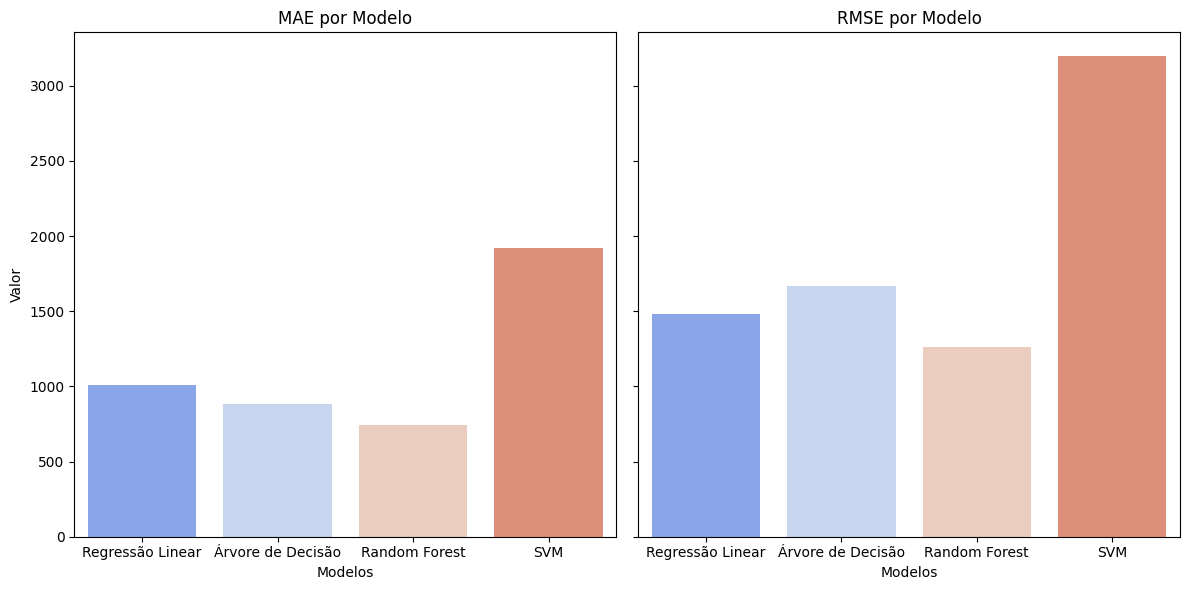

In [49]:
# Criando um gráfico de comparação
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.barplot(ax=axes[0], x=models, y=mae_values, hue=models, palette='coolwarm').set(title='MAE por Modelo', xlabel='Modelos', ylabel='Valor')
sns.barplot(ax=axes[1], x=models, y=rmse_values, hue=models, palette='coolwarm').set(title='RMSE por Modelo', xlabel='Modelos')
plt.tight_layout()
plt.show()


Na análise dos resultados das comparações, concluímos que os modelos não são semelhantes entre si, pois apresentaram resultados variados. Notavelmente, o gráfico indica que o modelo de regressão `RandomForestRegressor()` destaca-se como a escolha mais vantajosa, uma vez que demonstrou possuir o menor Erro Absoluto Médio (MAE)e o menor Erro Qadrático Médio (RMSE). Essa observação sugere que, em termos de precisão e desempenho, destaca-se como a opção mais eficaz entre os modelos avaliados.

### Tunning dos Parâmetros

Realizando a seleção dos melhores parâmetros para o modelo selecionado **RandomForestRegressor** usando o [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [50]:
# Hiperparâmetros
parametros = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

lr = LinearRegression()
grid_lr = GridSearchCV(RandomForestRegressor(), parametros, n_jobs=-1)
grid_lr.fit(X_treino, y_treino)

# Melhores parâmetros
print("Melhores parâmetros para RandomForestRegressor:", grid_lr.best_params_)
print('Melhor resultado:', grid_lr.best_score_)

Melhores parâmetros para RandomForestRegressor: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor resultado: 0.8547375949452972


### Treinamendo do Modelo

In [51]:
modelo = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=2,
        max_features='sqrt',
        bootstrap=False
)
modelo.fit(X_treino, y_treino)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=200)

Treinando o modelo com os parâmetros observados na otimização.

### Análise de Pontuação

In [52]:
# Validação cruzada
scores = cross_val_score(modelo, X_processed, y, cv=5)
print("Pontuações de validação cruzada:", scores)
print("Pontuação média:", scores.mean())

Pontuações de validação cruzada: [0.81822867 0.84498835 0.86517161 0.85869002 0.85488789]
Pontuação média: 0.8483933089798192


In [53]:
modelo.score(X_teste, y_teste)

0.8763525083708573

Como podemos observar, o modelo tem uma média de 84.83% de acertos na base de treino enquanto que na base de teste tem 87.63%, a diferença esta longe de ser um problema de underfitting.

### Curva de Aprendizado

In [54]:
# Validação cruzada
tamanho, _, pontos_teste = learning_curve(modelo, X_processed, y, cv=10)
media_teste = np.mean(pontos_teste, axis=1)
std_teste = np.std(pontos_teste, axis=1)

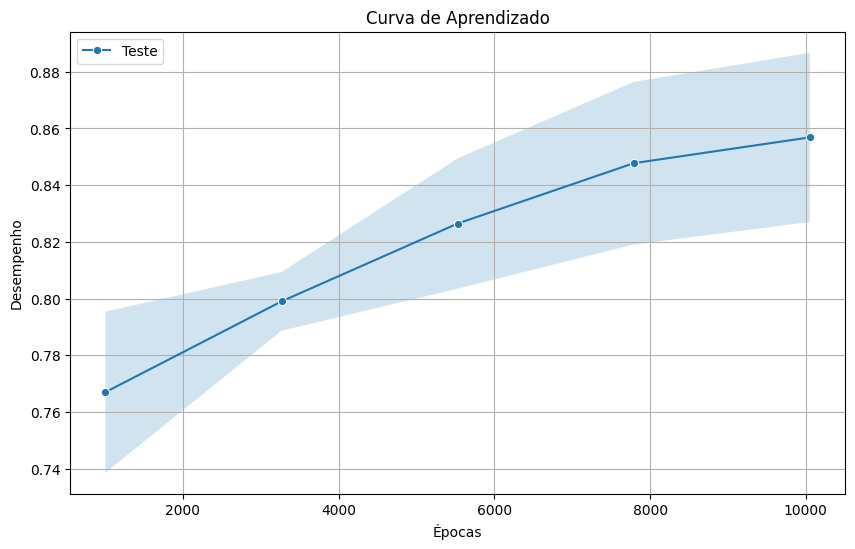

In [55]:
# Gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=tamanho, y=media_teste, label='Teste', marker='o')
plt.fill_between(tamanho, media_teste - std_teste, media_teste + std_teste, alpha=0.2)
plt.xlabel('Épocas')
plt.ylabel('Desempenho')
plt.title('Curva de Aprendizado')
plt.legend(loc='best')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Observando o grafico, podemos verificar que o modelo vai tendo um ganho de desempenho, aumentando sua pontuação e conseguentimento sua acertividade na previsão dos preços de alugueis.

### Previsões do Modelo

In [56]:
# Gerando previsões
previsoes = modelo.predict(X_teste)

In [57]:
# Calculando o MAE (mean_absolut_error)
mean_absolute_error(y_teste, previsoes)

707.6980396866163

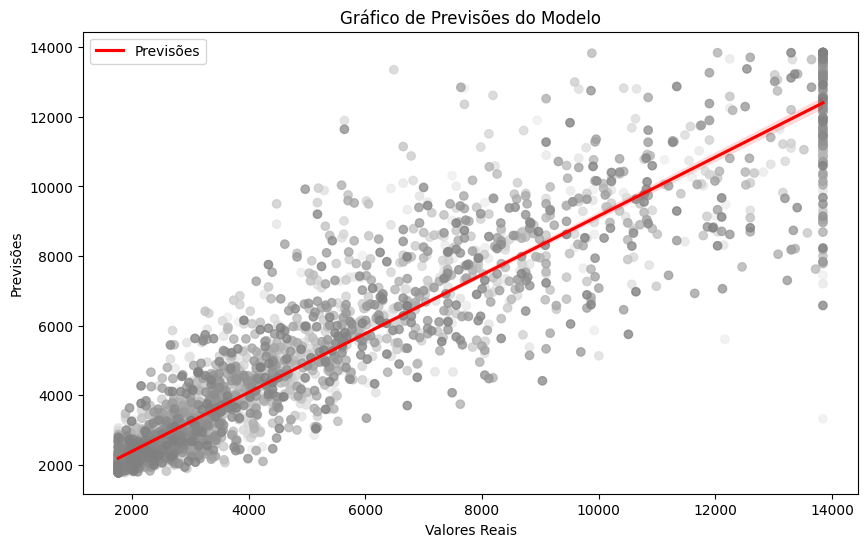

In [58]:
# Preparando dados
resultado = pd.DataFrame()
resultado['aluguel'] = y_teste.copy()
resultado['previsoes'] = previsoes

# Gerando gráfico
plt.figure(figsize=(10,6))
ax = sns.regplot(resultado, x='aluguel', y='previsoes', color='r',
           scatter_kws={'color':sns.color_palette('light:gray', n_colors=len(resultado['previsoes']))})
plt.legend([ax.get_lines()[0]], ['Previsões'])
plt.title('Gráfico de Previsões do Modelo')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

Observando o gráfico notamos que a previsão (linha vermelha) segue a projeção dos valores reais (pontos cinzas), ficando agrupados, na sua maioria, próximo da linha de previsão, com a maior concentração entre 2.000 e 4.000.

### Testando o modelo

In [61]:
df_aluguel.iloc[1]

bairro             Jardim Paulista
tipo_imovel                   Flat
area_util                     34.0
banheiros                        1
suites                           0
quartos                          1
vagas_garagem                    1
taxa_condominio              714.0
preco_aluguel               1882.0
iptu_ano                      77.0
Name: 44, dtype: object

In [62]:
# Usando base já pré-processada
teste = X_processed[1]
teste = np.reshape(teste, (1,-1))

In [63]:
# Realizando a previsão do valor do aluguel
previsao = modelo.predict(teste)
previsao = previsao[0]

In [64]:
# Resultado
print(f'Valor do Aluguel Previsto: {previsao:.2f}')

Valor do Aluguel Previsto: 1882.00


## Conclusão



Com base nos resultados obtidos utilizando o modelo `RandomForestRegressor`, podemos concluir que o modelo desenvolvido apresentou um bom desempenho ficando acima dos resultados esperados, apresentando um escore de aproximadamente `0.8483` nos dados de treino e aproximadamente `0.8763` nos dados de teste evidenciam a capacidade do modelo em generalizar novos dados.

Em resumo, os resultados deste projeto indicam que o modelo criado usando o algoritmo, pode ser uma ótima ferramenta para prever os preços de aluguel com relativa precisão, considerando a influência significativa da localidade e do tamanho do imóvel na determinação dos preços. Este trabalho fornece uma base sólida para futuras análises e tomadas de decisão no âmbito do mercado imobiliário.